# Biostat 257 Homework 1

#### Due Apr 15 @ 11:59PM

#### Ami Sheth

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-257-2022-spring` and add `Hua-Zhou` and `maschepps` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in the `master` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (4) four space indenting rule, (6) 80 charcter rule, (7) space after comma rule, (8) no space before comma rule, (9) space around operator rule.

## Q2

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

4. Is `0 * x == 0` true for all floating-point number `x`? 

5. Is `x / a == x * (1 / a)` always true?

#### Solution Q2.1

In [1]:
x = 0.1
y = 0.1
z = 1.0

1.0

In [2]:
(x + y) + z

1.2

In [3]:
x + (y + z) 

1.2000000000000002

In [4]:
(x + y) + z == x + (y + z)

false

In this example, the associative rule does not hold because 0.1 cannot be defined in a finite way in binary, i.e. $0.1 = 1.10011001...x 2^{-4}$. As a result, the mantissa ending with 001(100...) is rounded to 010 according to IEEE *round to the nearest mode*. 

#### Solution to Q2.2

In [12]:
x = 1.2
y = 0.1
z = 0.2

0.2

In [13]:
(x * y) * z

0.024

In [14]:
x * (y * z)

0.024000000000000004

In [15]:
(x * y) * z == x * (y * z)

false

From the counter-example above, we see that floating-point numbers do not always obey the associative rule for multiplication.

#### Solution to Q2.3

In [16]:
x = 1.2
y = 1.1
a = 0.2

0.2

In [17]:
a * (x + y)

0.45999999999999996

In [18]:
a * x + a * y

0.46

In [19]:
a * (x + y) == a * x + a * y

false

From the counter-example above, we see that floating-point numbers do not always obey the distributive rule.

#### Solution to Q2.4

In [50]:
x = Inf

Inf

In [51]:
typeof(x)

Float64

In [52]:
0 * x == 0

false

From the counter-example above, we see that `0 * x == 0` is not true for all floating-point number `x`.

#### Solution to Q2.5

In [20]:
a = 0.1
x = 1.2

1.2

In [21]:
x / a

11.999999999999998

In [22]:
x * (1 / a)

12.0

In [23]:
x / a == x * (1 / a)

false

From the counter-example above, we see that `x / a == x * (1 / a)` is not always true.

## Q3

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
3. Compare the bitcode from questions 1 and 2. What do you find?  
4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
    Explain what does macro `@fastmath` do?

#### Solution to Q3.1-3.3

In [1]:
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end

g (generic function with 1 method)

In [2]:
@code_llvm g(5)

;  @ In[1]:1 within `g`
define i64 @julia_g_1184(i64 signext %0) #0 {
top:
;  @ In[1]:3 within `g`
; ┌ @ int.jl:88 within `*`
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-`
   %2 = add i64 %1, -2441406
; └
;  @ In[1]:5 within `g`
  ret i64 %2
}


In [3]:
@code_llvm g(5.0)

;  @ In[1]:1 within `g`
define double @julia_g_1214(double %0) #0 {
top:
;  @ In[1]:3 within `g`
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %10 = fadd double %9, -1.000000e+00
;

Comparing the bitcode from question 1 and 2, we find that the function optimizes low-level code based on the data type. The bitcodes will perform differently based on an integer vs floating-point input, which does not hold for all programming languages. 

#### Solution to Q3.4

In [4]:
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

`g_fastmath` 

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.  

2. Plot the polynomial `y = (x - 1)^7` at points `x`.  

3. Explain what you found.

#### Solution to Q4

In [5]:
x = collect(0.988:0.001:1.012)

25-element Vector{Float64}:
 0.988
 0.989
 0.99
 0.991
 0.992
 0.993
 0.994
 0.995
 0.996
 0.997
 0.998
 0.999
 1.0
 1.001
 1.002
 1.003
 1.004
 1.005
 1.006
 1.007
 1.008
 1.009
 1.01
 1.011
 1.012

In [6]:
y1 = (x .^ 7 - 7 * x .^ 6 + 21 * x .^ 5 - 35 * x .^ 4 + 35 * x.^ 3 - 21 * 
    x .^ 2 + 7 * x .- 1)

25-element Vector{Float64}:
 -3.552713678800501e-14
 -2.3092638912203256e-14
 -1.4210854715202004e-14
 -7.993605777301127e-15
 -6.217248937900877e-15
 -4.440892098500626e-15
 -1.7763568394002505e-15
 -3.552713678800501e-15
 -1.7763568394002505e-15
 -2.6645352591003757e-15
 -8.881784197001252e-16
 -1.7763568394002505e-15
  0.0
 -5.329070518200751e-15
 -6.217248937900877e-15
  1.7763568394002505e-15
 -1.7763568394002505e-15
 -8.881784197001252e-16
 -1.7763568394002505e-15
  0.0
  2.6645352591003757e-15
 -3.552713678800501e-15
  7.105427357601002e-15
  1.865174681370263e-14
  4.618527782440651e-14

In [7]:
y2 = (x .- 1) .^ 7

25-element Vector{Float64}:
 -3.583180800000022e-14
 -1.9487171000000122e-14
 -1.0000000000000062e-14
 -4.78296900000003e-15
 -2.0971520000000132e-15
 -8.235430000000051e-16
 -2.7993600000000173e-16
 -7.812500000000048e-17
 -1.6384000000000103e-17
 -2.1870000000000135e-18
 -1.280000000000008e-19
 -1.0000000000000063e-21
  0.0
  9.99999999999229e-22
  1.280000000000008e-19
  2.186999999999447e-18
  1.6384000000000103e-17
  7.812499999998834e-17
  2.7993600000000173e-16
  8.235429999999137e-16
  2.0971520000000132e-15
  4.7829689999996165e-15
  1.0000000000000062e-14
  1.9487170999998743e-14
  3.583180800000022e-14

In [8]:
using Plots
pyplot()  # set the backend to PyPlot

Plots.PyPlotBackend()

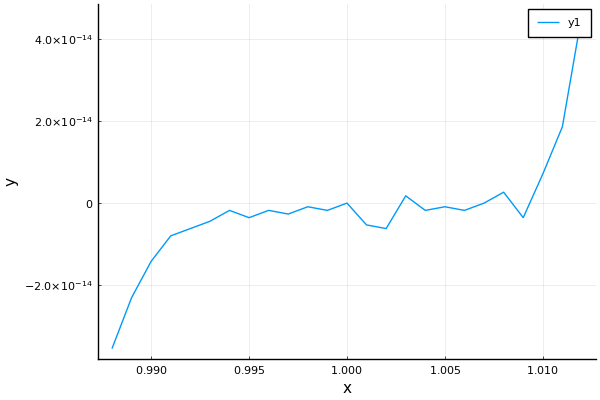

In [9]:
Plots.plot(x, y1, main = "Polynomial 1", xlab = "x", ylab = "y")

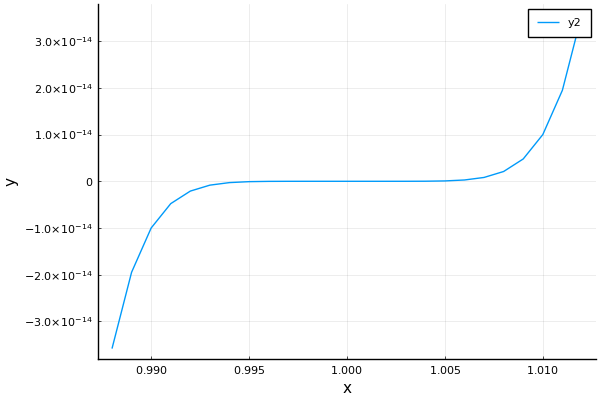

In [19]:
Plots.plot(x, y2, main = "Polynomial 2", xlab = "x", ylab = "y", 
    label = "y2")

The two polynomials should be the same, but when graphed the second polynomial is more smooth than the first polynomial. This discrepancy is because subtraction of two nearly equal numbers eliminates significant digits (catastrophic cancellation), so there is a loss of precision in the first polynomial. `(x - 1)^7` is better way of calculating/plotting the polynomial. 

## Q5

1. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

2. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

3. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

4. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Hint**: 1 and 2 are special cases of 3.

I will first show that if Q5.3 holds, then Q5.1 and Q5.2 will hold as well because they are special cases of 3. 

#### Solution to Q5.3

If $$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$ then $$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} (\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T) = (\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1})(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T) = \mathbf{I}_n.
$$

Let's prove this to be true.

$$(\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1})(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)$$
$$ = \mathbf{A}^{-1} \mathbf{A} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{A} + \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{V}^T - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{V}^T$$
$$ = (\mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{V}^T) - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{V}^T$$
$$ = (\mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{V}^T) - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1}[\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B}] \mathbf{V}^T$$
$$ = (\mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{V}^T) - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1}[\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}] \mathbf{B} \mathbf{V}^T $$
$$ = (\mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{V}^T) - \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{V}^T$$
$$ = \mathbf{I}_n$$

Therefore, the binomial inversion formula holds.

#### Solution to Q5.1

From Q5.3, we proved that $$(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}$$ and Q5.1 is a special case of Q5.3 where $$\mathbf{A} = \mathbf{A}, \mathbf{U} = \mathbf{u}, \mathbf{B} = 1, \mathbf{V}^T = \mathbf{u}^T.$$ $\mathbf{B}$ is a scalar equal to 1 since $\mathbf{u}$ is $nx1.$

Therefore, plugging into the binomial inversion formula from Q5.3, we get

$$ (\mathbf{A} + \mathbf{u}\mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{u} (1^{-1} + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u})^{-1} \mathbf{u}^T \mathbf{A}^{-1}$$
$$ = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}$$

#### Solution to Q5.2

From Q5.3, we proved that $$(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}$$ and Q5.2 is a special case of Q5.3 where $$\mathbf{A} = \mathbf{A}, \mathbf{U} = \mathbf{U}, \mathbf{B} = \mathbf{I}_m, \mathbf{V}^T = \mathbf{V}^T.$$ $\mathbf{B} = \mathbf{I}_m$ since $\mathbf{U}$ is $nxm$ and $\mathbf{V}^T$ is $mxn.$

Therefore, plugging into the binomial inversion formula from Q5.3, we get

$$(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}$$
$$ = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}$$

#### Solution to Q5.4

$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}[\mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T]) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T).
$$

Weinstein-Aronszajn identity states that $\text{det} (\mathbf{I}_n + \mathbf{B} \mathbf{A}) = \text{det}(\mathbf{I}_m + \mathbf{A} \mathbf{B}).$

**Proof**

Let $\mathbf{M} = \begin{bmatrix} \mathbf{I}_m & -\mathbf{A} \\ \mathbf{B} & \mathbf{I}_n \end{bmatrix}$ where $\mathbf{I}_m$ and $\mathbf{I}_n$ are invertible. Using the determinant property for block matrices, 

$$\text{det}(\mathbf{M}) = \text{det}(\mathbf{I}_m) \text{det}(\mathbf{I}_n - \mathbf{B} \mathbf{I}_m^{-1} (-\mathbf{A}))$$
$$ = \text{det}(\mathbf{I}_n + \mathbf{B} \mathbf{A})$$

or

$$\text{det}(\mathbf{M}) = \text{det}(\mathbf{I}_n) \text{det}(\mathbf{I}_m - (-\mathbf{A}) \mathbf{I}_n^{-1} \mathbf{B} )$$
$$ = \text{det}(\mathbf{I}_m + \mathbf{A} \mathbf{B})$$

Thus, $\text{det} (\mathbf{I}_n + \mathbf{B} \mathbf{A}) = \text{det}(\mathbf{I}_m + \mathbf{A} \mathbf{B}).$

Let $\mathbf{A} = \mathbf{V}^T$ and $\mathbf{B} = \mathbf{A}^{-1} \mathbf{U}$. 
Then $$\text{det}(\mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})$$ and $$\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})$$

## Q6

Demonstrate the following facts about triangular and orthogonal matrices in Julia (one example for each fact). Mathematically curious ones are also encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

5. An orthogonal upper (lower) triangular matrix is diagonal. (You just need to prove this.)

6. The product of two orthogonal matrices is orthogonal.

#### Solution to Q6.1

In [84]:
using LinearAlgebra

In [85]:
A = UpperTriangular(randn(5, 5))

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 -0.00674502  0.677091   2.2315   -1.17773     0.786699
   ⋅          1.18395    1.35712  -0.0588858   0.0691429
   ⋅           ⋅        -1.24067  -0.0954086   0.984335
   ⋅           ⋅          ⋅       -0.389458   -1.77012
   ⋅           ⋅          ⋅         ⋅         -0.356935

In [86]:
B = UpperTriangular(randn(5, 5))

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.0067907  -1.08065  -1.61313    0.548994  -0.805844
  ⋅          1.37153   0.515807  -1.60892    0.567424
  ⋅           ⋅       -0.238329  -1.5194    -1.0845
  ⋅           ⋅         ⋅        -1.95049   -0.486788
  ⋅           ⋅         ⋅          ⋅         2.01574

In [87]:
A * B

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 -4.58034e-5  0.935937  -0.171704  -2.1865     0.128653
   ⋅          1.62382    0.287249  -3.85204   -0.631956
   ⋅           ⋅         0.295688   2.07117    3.37612
   ⋅           ⋅          ⋅         0.759633  -3.37851
   ⋅           ⋅          ⋅          ⋅        -0.719489

The product of two upper triangular matrices is an upper triangular matrix. 

#### Solution to Q6.2

In [88]:
invA = inv(A)

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 -148.257  84.7869    -173.914     478.118     -3161.04
     ⋅      0.844628     0.923905   -0.354043      4.46728
     ⋅       ⋅          -0.806015    0.197456     -3.202
     ⋅       ⋅            ⋅         -2.56767      12.7336
     ⋅       ⋅            ⋅           ⋅           -2.80163

The inverse of an upper triangular matrix is an upper triangular matrix.

#### Solution to Q6.3

In [89]:
UnitA = UnitUpperTriangular(randn(5, 5))

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  -0.00016585   0.994369  -0.373851   0.913123
  ⋅    1.0         -0.508796  -0.678243   1.10271
  ⋅     ⋅           1.0       -0.431733   0.813245
  ⋅     ⋅            ⋅         1.0       -0.942103
  ⋅     ⋅            ⋅          ⋅         1.0

In [90]:
UnitB = UnitUpperTriangular(randn(5, 5))

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  1.49707   1.27755    0.136005  1.206
  ⋅   1.0      -0.308555  -1.94889   0.435759
  ⋅    ⋅        1.0       -1.41728   0.0506032
  ⋅    ⋅         ⋅         1.0       0.578691
  ⋅    ⋅         ⋅          ⋅        1.0

In [91]:
UnitA * UnitB

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  1.4969   2.27197  -1.64683   1.95303
  ⋅   1.0     -0.81735  -1.90603   1.12023
  ⋅    ⋅       1.0      -1.84902   0.614008
  ⋅    ⋅        ⋅        1.0      -0.363412
  ⋅    ⋅        ⋅         ⋅        1.0

The product of two unit upper triangular matrices is a unit upper triangular matrix. 

#### Solution to Q6.4

In [92]:
invUnitA = inv(UnitA)

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  0.00016585  -0.994285  -0.055302  -0.156809
  ⋅   1.0          0.508796   0.897907  -0.670568
  ⋅    ⋅           1.0        0.431733  -0.406508
  ⋅    ⋅            ⋅         1.0        0.942103
  ⋅    ⋅            ⋅          ⋅         1.0

The inverse of a unit upper triangular matrix is a unit upper triangular matrix.

#### Solution to Q6.5

In [99]:
A = UpperTriangular(randn(5, 5))
Q, R = qr(A)

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}}
Q factor:
5×5 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0
R factor:
5×5 Matrix{Float64}:
 1.60525  1.54303  -1.46344    2.32472   -0.3302
 0.0      1.87953  -0.299656   1.73941   -0.030181
 0.0      0.0      -1.14351    0.41564   -0.339774
 0.0      0.0       0.0       -0.318378  -0.179265
 0.0      0.0       0.0        0.0       -0.776597

In [100]:
Q

5×5 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

An orthogonal upper triangular matrix is diagonal.

#### Solution to Q6.6

In [72]:
A = randn(5, 5)
Q_A, R_A = qr(A)

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}}
Q factor:
5×5 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}}:
 -0.122488  -0.436414   -0.0956952  -0.293364  -0.836253
 -0.428256  -0.456757    0.736033   -0.079497   0.244756
 -0.687204  -0.0451292  -0.338659    0.63821   -0.0609273
  0.265858  -0.758338   -0.443578    0.035001   0.395293
 -0.50859    0.154283   -0.371006   -0.706456   0.284265
R factor:
5×5 Matrix{Float64}:
 -1.88082  -0.748204  -2.84193   0.557067    -0.651707
  0.0      -0.919646  -1.87767   0.00817704   2.06382
  0.0       0.0        0.959358  0.825708     0.0780307
  0.0       0.0        0.0       1.52527      1.07931
  0.0       0.0        0.0       0.0         -1.01527

In [75]:
B = randn(5, 5)
Q_B, R_A = qr(B)

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}}
Q factor:
5×5 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}}:
 -0.0340073  -0.268911   0.816879    0.00746106  -0.509101
  0.476396   -0.640658  -0.26957    -0.521619    -0.133605
 -0.416298    0.193833  -0.421521   -0.207317    -0.753966
 -0.769444   -0.43281    0.0546665  -0.292496     0.36344
 -0.0808803  -0.540693  -0.281732    0.77416     -0.149707
R factor:
5×5 Matrix{Float64}:
 -2.01966  -0.755517  0.0329409   -0.387874  -0.951108
  0.0      -1.94256   0.00794234  -0.54786   -0.752596
  0.0       0.0       2.8409      -0.332657   0.168857
  0.0       0.0       0.0          0.758497  -0.800331
  0.0       0.0       0.0          0.0        0.115275

In [78]:
Q_C = Q_A * Q_B

5×5 Matrix{Float64}:
  0.129461   0.873109    0.277486  -0.315019   0.21139
 -0.46807    0.452524   -0.61026    0.295199  -0.341428
 -0.343286  -0.0952145  -0.354391  -0.145219   0.852295
 -0.244552   0.0994819   0.499123   0.78529    0.253955
  0.765832   0.11807    -0.419366   0.419347   0.218726

In [80]:
det(Q_C)

0.9999999999999989

In [82]:
Q_C * Q_C'

5×5 Matrix{Float64}:
  1.0          -3.0996e-16   9.5058e-17   1.94173e-16  -3.23938e-16
 -3.0996e-16    1.0          3.65494e-16  1.91199e-16  -6.21995e-17
  9.5058e-17    3.65494e-16  1.0          4.00351e-17   9.74354e-18
  1.94173e-16   1.91199e-16  4.00351e-17  1.0           1.32277e-16
 -3.23938e-16  -6.21995e-17  9.74354e-18  1.32277e-16   1.0

Since $\text{det}(\mathbf{Q}_c) = 1$ and $\mathbf{Q}_c \mathbf{Q}_c^T = \mathbf{I}, \mathbf{Q}_c$ is orthogonal. Therefore, the product of two orthogonal matrices is orthogonal.